### Data Description:
- The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context: 
- This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### ** Importing necessary library

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ps

In [99]:
# Loading Data

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [100]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [102]:
# Checking if there is null value:

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [103]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [104]:
# Dropping the column which has no use in our analysis

df.drop(['ID','ZIP Code'], axis = 1, inplace = True)

In [105]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [106]:
# Checking datatypes of each column

df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [107]:
# Checking Skewness of data

df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [108]:
# 5 Number summary
fig = ps.box(df, y = ['Age', 'Experience', 'Education', 'Income', 'Family'])
fig.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

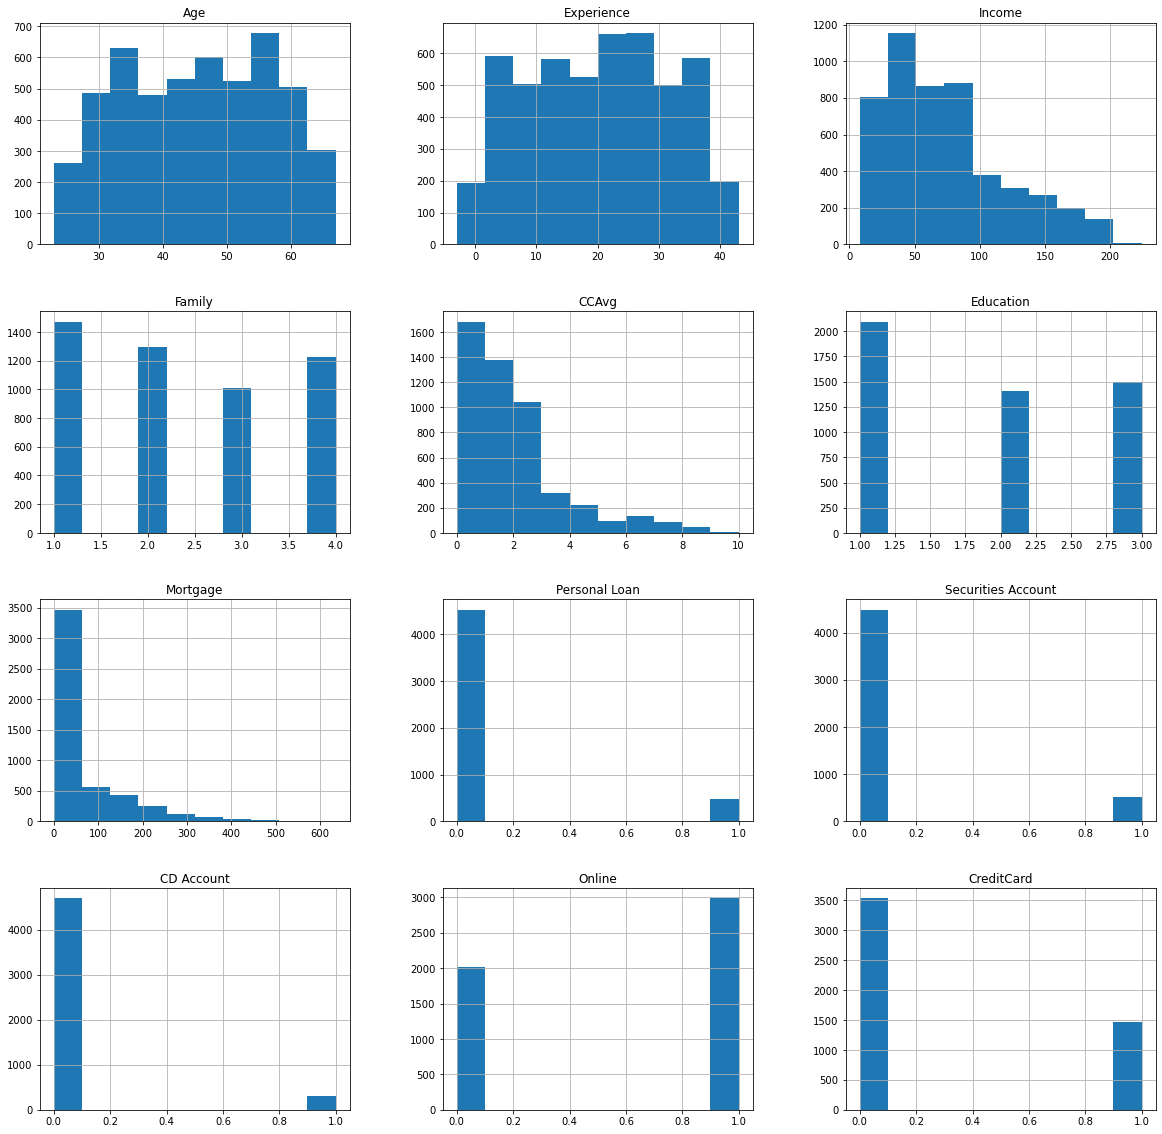

In [109]:
# Plotting Histogram of each column:

df.hist(figsize = (20,20))

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

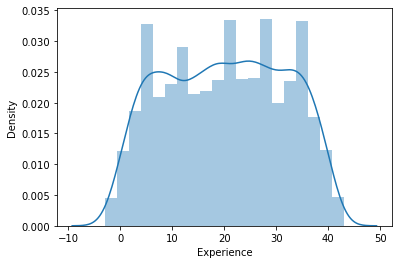

In [110]:
sns.distplot(df['Experience'])

##### Observation:
- Here we are seeing negative experience which we need to take care of

In [111]:
df['Experience'].mean()

20.1046

In [112]:
negative_exp = df[df['Experience'] < 0]

In [113]:
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [114]:
negative_exp.shape

(52, 12)

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

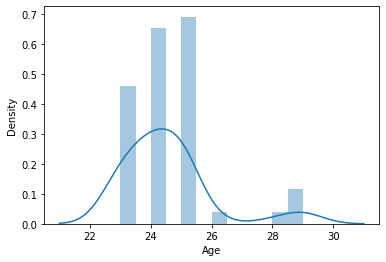

In [115]:
sns.distplot(negative_exp['Age'])

In [116]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [117]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size ,
                                            ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [118]:
data = df.copy()

In [119]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


##### Replacing negative experience with "Experience Mean" value

In [120]:
data['Experience'] = np.where(data['Experience']< 0,
                             data['Experience'].mean(),
                             data['Experience'])

In [121]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [122]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048708,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018097,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

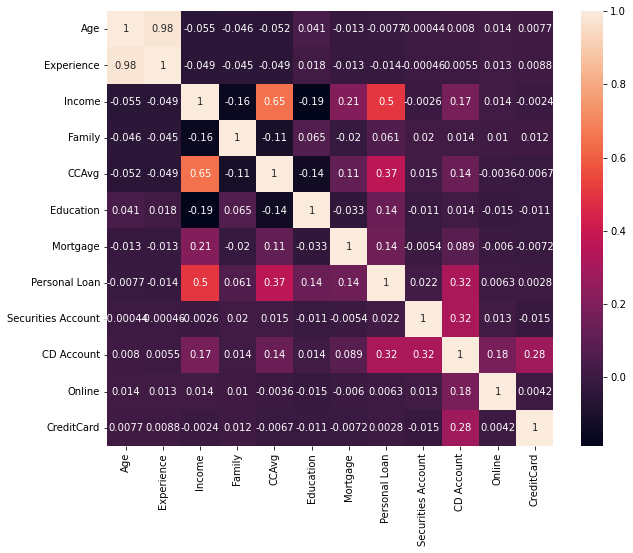

In [123]:
# Plotting Correlation heatmap

plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

In [124]:
# The Age and Experience column is highly correlated so we can drop experience column

data = data.drop(['Experience'], axis = 1)

In [126]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [52]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [53]:
# Creating a function to make a new column for education 

def experience(x):
    if x == 1:
        return "Undergraduate"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Professional"

In [54]:
# Creating an Education column with Categorical value

data['EDU'] = data['Education'].apply(experience)

In [55]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [56]:
education_dis = data.groupby('EDU')['Age'].count()

In [127]:
education_dis

EDU
Graduate         1403
Professional     1501
Undergraduate    2096
Name: Age, dtype: int64

In [57]:
# Ploting pie chart to find percentage of education 

fig = ps.pie(data, values =education_dis, names = education_dis.index, title = 'Pie chart' )
fig.show()

In [60]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [62]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [63]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [67]:
# Creating a function to change binary value to categorical value for relevant column

def security(y):
    if (y['Securities Account'] == 1) & (y['CD Account']==1):
        return 'Hold securities & deposit account'
    if (y['Securities Account'] == 0) & (y['CD Account']==0):
        return 'Does not hold securities & deposit'
    if (y['Securities Account'] == 1) & (y['CD Account']==0):
        return 'Hold only securities account'
    if (y['Securities Account'] == 0) & (y['CD Account']==1):
        return 'Hold only deposit account'

In [68]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [69]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate,Hold only securities account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate,Hold only securities account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate,Does not hold securities & deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not hold securities & deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not hold securities & deposit


In [71]:
values = data['Account_holder_category'].value_counts()
values.index

Index(['Does not hold securities & deposit', 'Hold only securities account',
       'Hold only deposit account', 'Hold securities & deposit account'],
      dtype='object')

In [72]:
fig = ps.pie(data, values =values, names = values.index, title = 'Pie chart' )
fig.show()

In [74]:
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



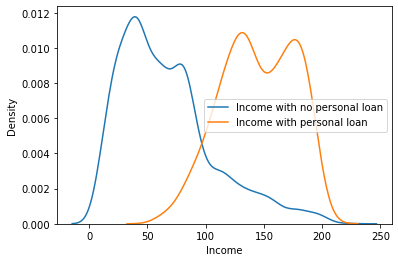

In [77]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False,
            label = 'Income with no personal loan')

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = 'Income with personal loan')
plt.legend()

In [78]:
def plot(col1, col2, label1, label2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False,
            label = label1)
    sns.distplot(data[data[col2] == 1][col1], hist = False,
            label = label2)
    plt.legend()
    plt.title(title)

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



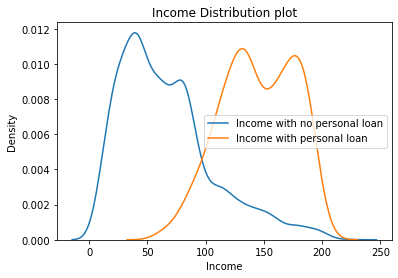

In [79]:
plot('Income', 'Personal Loan', 'Income with no personal loan', 'Income with personal loan', 'Income Distribution plot' )

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



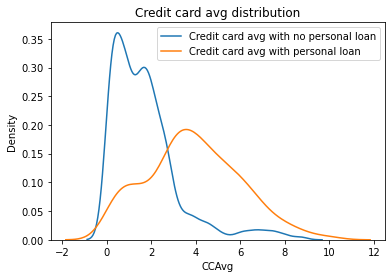

In [81]:
plot('CCAvg','Personal Loan','Credit card avg with no personal loan', 'Credit card avg with personal loan',
    'Credit card avg distribution')

In [82]:
col = ['Securities Account','Online','Account_holder_category','CreditCard']

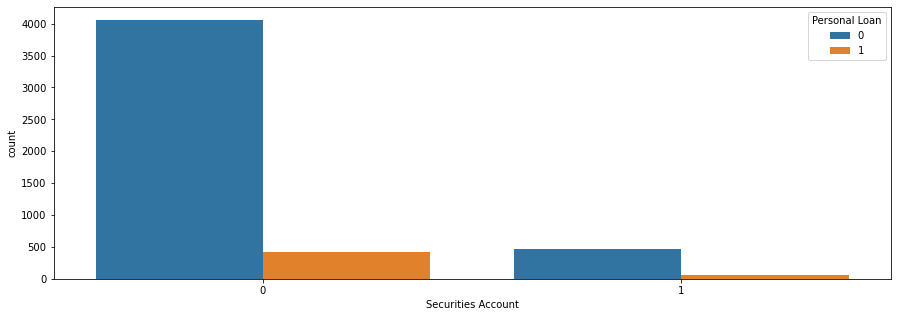

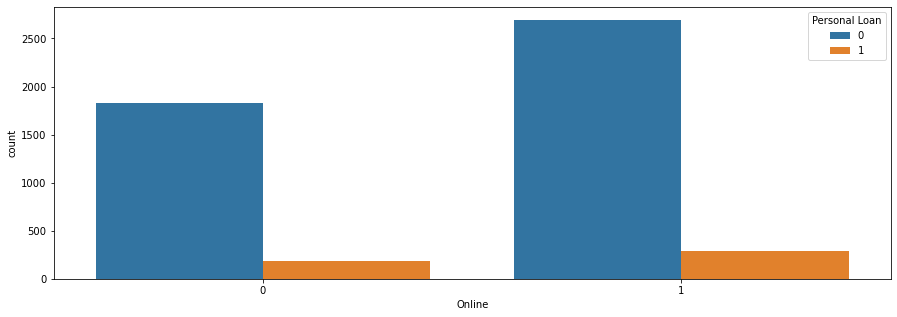

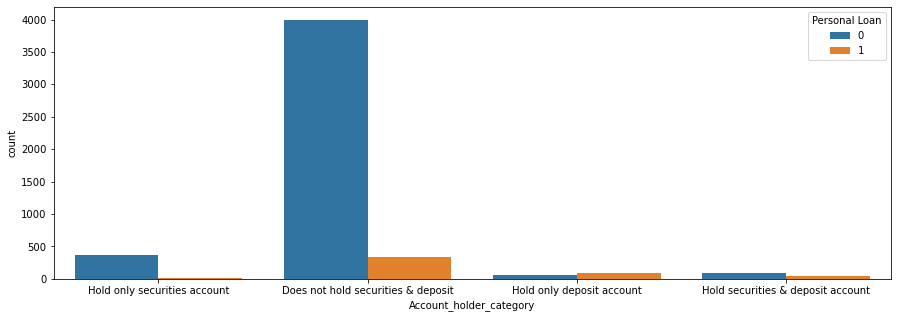

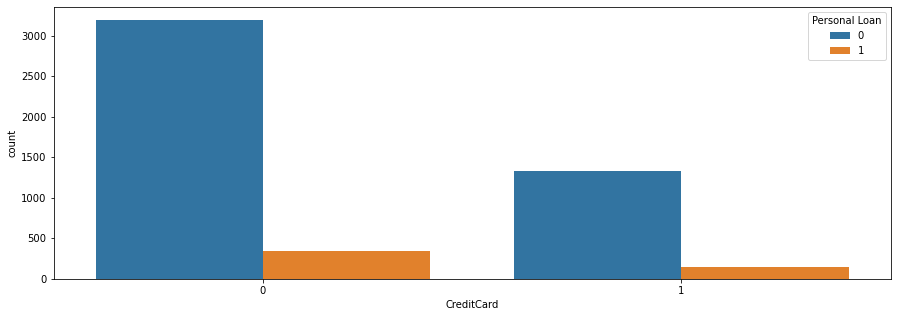

In [87]:
for i in col:
    plt.figure(figsize=(15,5))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

In [88]:
from scipy.stats import zscore

In [89]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1
print(IQR)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


In [90]:
# Log Normal Transform
data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1 + 1)
data_1
               

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


In [93]:
# Power Transformer

from sklearn.preprocessing import PowerTransformer

C:\Users\Pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



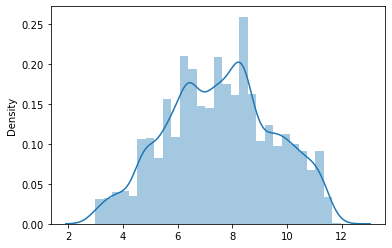

In [95]:
pt= PowerTransformer(method = 'yeo-johnson', standardize = False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()